In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the dataset
data=pd.read_csv("/Users/premkumar/SUTD WTH/Possible Datasets/Dataset_2_symbipredict_2022.csv")
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection


In [4]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,...,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000
mean,0.137875,0.159847,0.021971,0.045152,0.021971,0.162266,0.139085,0.045152,0.045152,0.021971,...,0.021971,0.021971,0.021971,0.023181,0.023181,0.023181,0.023181,0.023181,0.023181,0.023181
std,0.344804,0.366501,0.146605,0.207659,0.146605,0.368732,0.346070,0.207659,0.207659,0.146605,...,0.146605,0.146605,0.146605,0.150493,0.150493,0.150493,0.150493,0.150493,0.150493,0.150493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4961 entries, 0 to 4960
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


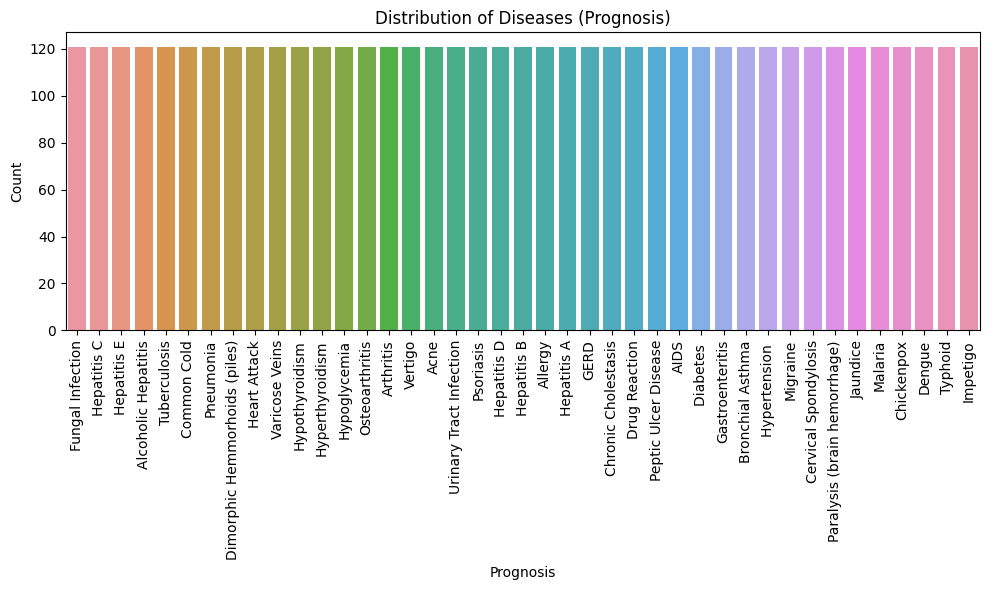

In [6]:
# 1. Distribution of Diseases (Prognosis)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='prognosis', order=data['prognosis'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Diseases (Prognosis)')
plt.xlabel('Prognosis')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

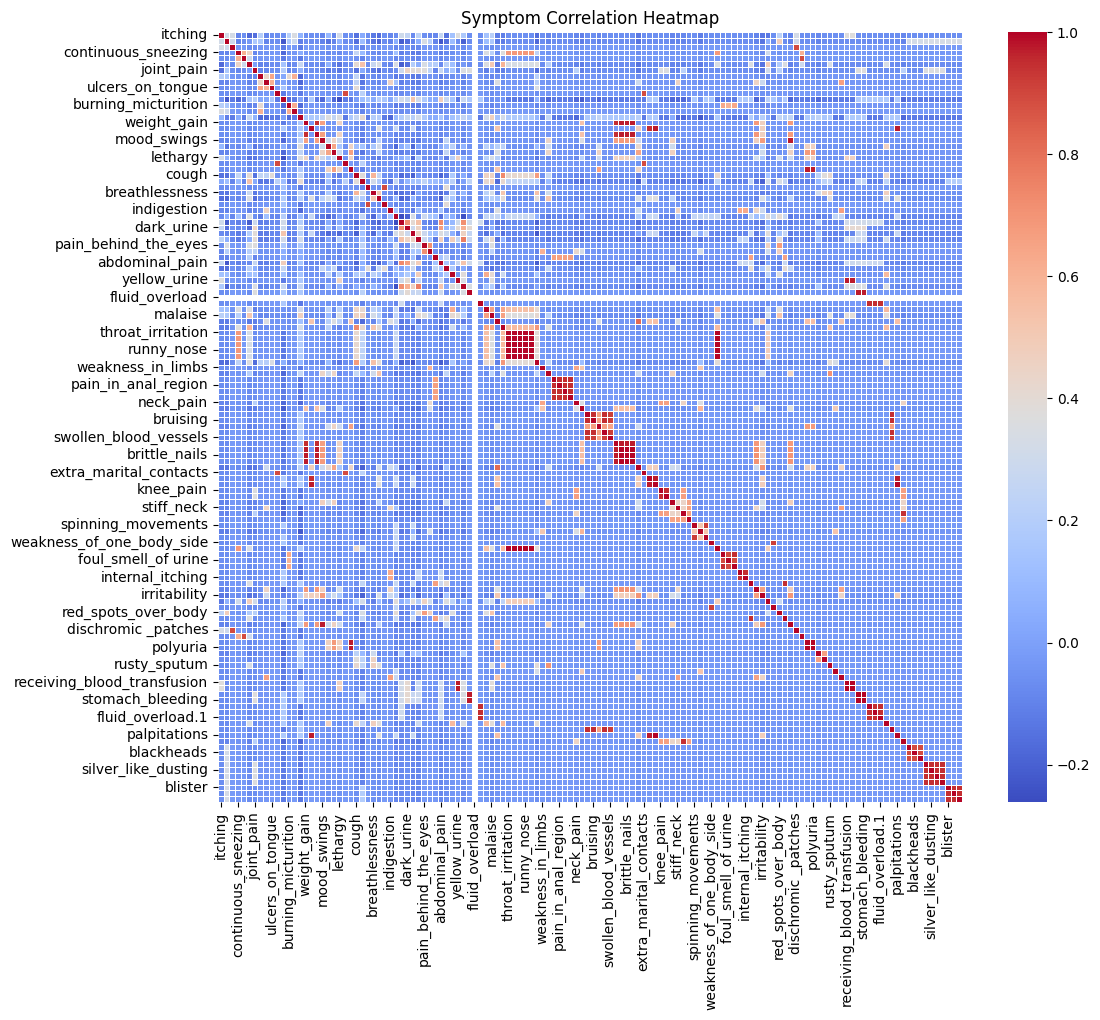

In [7]:
# 2. Correlation Heatmap for Symptoms
correlation_matrix = data.iloc[:, :-1].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Symptom Correlation Heatmap')
plt.show()

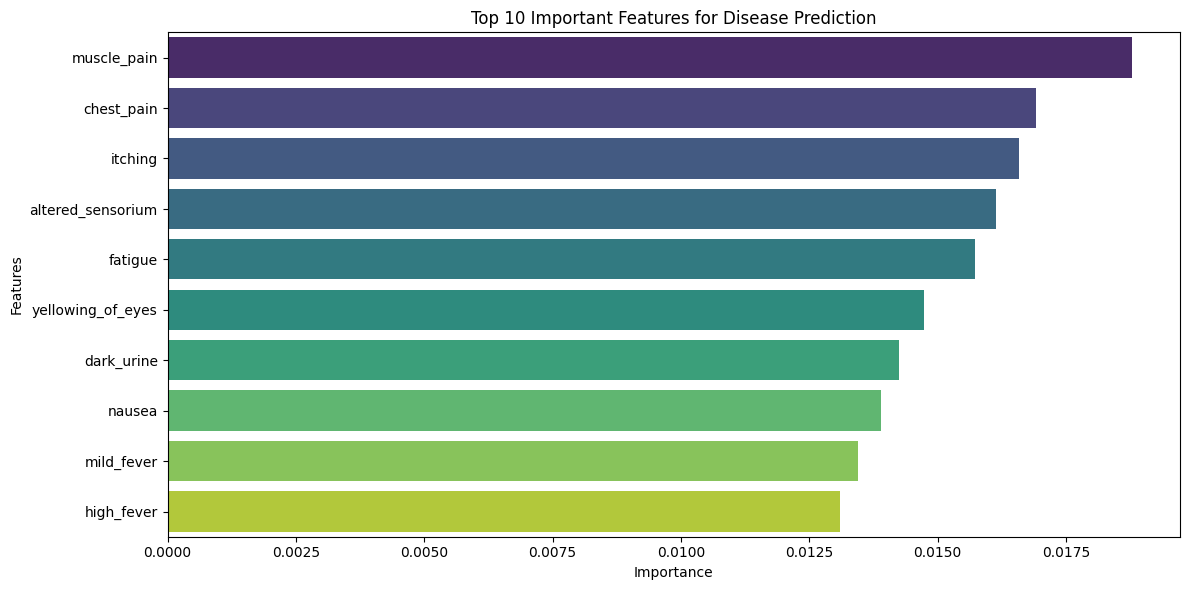

In [8]:
# Clean the dataset
# Convert all symptom columns to numeric
data_cleaned = data.copy()
for col in data_cleaned.columns[:-1]:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

# Drop rows with missing values
data_cleaned = data_cleaned.dropna()

# Encode the 'prognosis' column
label_encoder = LabelEncoder()
data_cleaned['prognosis'] = label_encoder.fit_transform(data_cleaned['prognosis'])

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(data_cleaned.iloc[:, :-1], data_cleaned['prognosis'])

# Extract feature importance
feature_importances = pd.DataFrame({
    'Feature': data_cleaned.columns[:-1],
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importances.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Important Features for Disease Prediction')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [9]:
# Separate features (symptoms) and target (prognosis)
X = data.drop(columns=['prognosis'])
y = data['prognosis']

In [10]:
# Generate a numbered list of symptoms
symptoms_list = {i + 1: symptom for i, symptom in enumerate(X.columns)}
print("Symptom List:")
for key, value in symptoms_list.items():
    print(f"{key}. {value}")

Symptom List:
1. itching
2. skin_rash
3. nodal_skin_eruptions
4. continuous_sneezing
5. shivering
6. chills
7. joint_pain
8. stomach_pain
9. acidity
10. ulcers_on_tongue
11. muscle_wasting
12. vomiting
13. burning_micturition
14. spotting_ urination
15. fatigue
16. weight_gain
17. anxiety
18. cold_hands_and_feets
19. mood_swings
20. weight_loss
21. restlessness
22. lethargy
23. patches_in_throat
24. irregular_sugar_level
25. cough
26. high_fever
27. sunken_eyes
28. breathlessness
29. sweating
30. dehydration
31. indigestion
32. headache
33. yellowish_skin
34. dark_urine
35. nausea
36. loss_of_appetite
37. pain_behind_the_eyes
38. back_pain
39. constipation
40. abdominal_pain
41. diarrhoea
42. mild_fever
43. yellow_urine
44. yellowing_of_eyes
45. acute_liver_failure
46. fluid_overload
47. swelling_of_stomach
48. swelled_lymph_nodes
49. malaise
50. blurred_and_distorted_vision
51. phlegm
52. throat_irritation
53. redness_of_eyes
54. sinus_pressure
55. runny_nose
56. congestion
57. chest_

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Limit tree depth to reduce overfitting and ensure generalization
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [13]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [14]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
validation_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Training Accuracy: 100.00%
Validation Accuracy: 100.00%

Classification Report:
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00        24
                         Acne       1.00      1.00      1.00        24
          Alcoholic Hepatitis       1.00      1.00      1.00        24
                      Allergy       1.00      1.00      1.00        24
                    Arthritis       1.00      1.00      1.00        24
             Bronchial Asthma       1.00      1.00      1.00        24
         Cervical Spondylosis       1.00      1.00      1.00        24
                   Chickenpox       1.00      1.00      1.00        25
          Chronic Cholestasis       1.00      1.00      1.00        24
                  Common Cold       1.00      1.00      1.00        24
                       Dengue       1.00      1.00      1.00        25
                    Diabetes        1.00      1.00      1.00       

In [15]:
# Feature importance
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Top 10 Most Important Features:
                   Feature  Importance
108           rusty_sputum    0.023498
104     increased_appetite    0.016381
36    pain_behind_the_eyes    0.016220
73     swollen_extremeties    0.014204
100             belly_pain    0.014154
97             muscle_pain    0.014025
50                  phlegm    0.013324
109  lack_of_concentration    0.013256
101  abnormal_menstruation    0.013059
41              mild_fever    0.012822


In [16]:
# Function for making predictions based on user input
def predict_disease():
    # Ask the user to input symptom numbers
    while True:
        try:
            user_input = input("Enter symptom numbers separated by commas (e.g., 1,2,3): ")
            symptom_numbers = list(map(int, user_input.split(',')))

            # Validate input numbers
            if all(num in symptoms_list for num in symptom_numbers):
                break
            else:
                print("Invalid input. Please enter numbers only from the symptom list.")
        except ValueError:
            print("Invalid input. Please enter integers only.")

    # Create a dictionary with all symptoms set to 0
    symptoms = {symptom: 0 for symptom in X.columns}
    
    # Update symptoms based on input numbers
    for num in symptom_numbers:
        symptoms[symptoms_list[num]] = 1
    
    # Convert symptoms dictionary to DataFrame
    input_data = pd.DataFrame([symptoms], columns=X.columns)
    
    # Predict using the trained model
    prediction = rf_model.predict(input_data)[0]
    
    return prediction

# Predict disease based on user input
predicted_disease = predict_disease()
print(f"\nPredicted Disease: {predicted_disease}")

Enter symptom numbers separated by commas (e.g., 1,2,3): 35,90,113

Predicted Disease: Urinary Tract Infection


In [17]:
import joblib
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(symptoms_list, "symptoms_list.pkl")

['symptoms_list.pkl']